# Historical Wind Speed over Brazil

Data source: NASA MERRA 2

## Definitions

- U winds comes from the west
    - $\vec{u} \cdot \hat{x} = \vec{u}$ 
    - $\vec{u} \cdot \hat{y} = 0$ 
- V winds comes from the south
    - $\vec{v} \cdot \hat{x} = 0$ 
    - $\vec{v} \cdot \hat{y} = \vec{v}$ 
- $\hat{y}$ is north direction
- $\hat{x}$ is east direction



## Setting-up

- https://disc.gsfc.nasa.gov/datasets?page=1&measurement=U%2FV%20Wind%20Components&project=MERRA-2&temporalResolution=3%20hours&spatialResolution=0.5%20%C2%B0%20x%200.625%20%C2%B0


## References

[1] - MERRA-2: File Specification, https://gmao.gsfc.nasa.gov/pubs/docs/Bosilovich785.pdf

In [1]:
%load_ext autotime

time: 402 µs (started: 2021-07-23 17:22:40 -03:00)


In [2]:
import xarray as xr
from tqdm.auto import tqdm
import os
import numpy as np

time: 493 ms (started: 2021-07-23 17:22:40 -03:00)


In [3]:
DATA_PATH = '../data/historical_wind_data.nc'

time: 507 µs (started: 2021-07-23 17:22:42 -03:00)


In [4]:
ds = xr.open_dataset(DATA_PATH)

mask = (ds.time.dt.month == 9)
ds = ds.isel(time=mask)
mask_2 = ds.lon < -52
ds = ds.isel(lon=mask_2)
ds = ds.assign(speed_in_kph=(ds.U ** 2 + ds.V ** 2) ** 1/2)
ds = ds.assign(angle_in_degree=np.arctan2(ds.U, ds.V) * 360 / (2 * np.pi))

time: 1.61 s (started: 2021-07-23 17:22:42 -03:00)


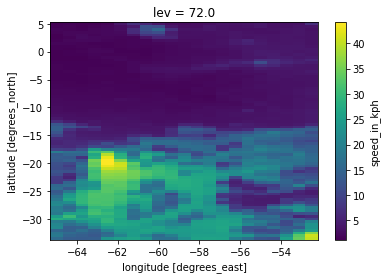

time: 294 ms (started: 2021-07-23 17:22:44 -03:00)


In [5]:
ds.speed_in_kph.mean(dim='time').plot()

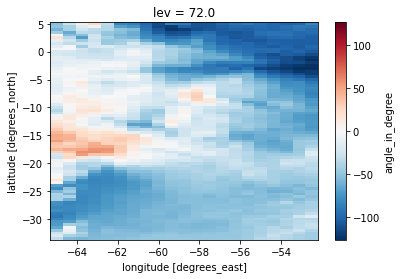

time: 110 ms (started: 2021-07-23 17:22:44 -03:00)


In [6]:
ds.angle_in_degree.mean(dim='time').plot()